<a href="https://colab.research.google.com/github/Vinithpr2004/PRODIGY_DS_4/blob/main/Prodigy_DS_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader , TensorDataset
from mlxtend.plotting import plot_confusion_matrix

In [2]:
lemma = WordNetLemmatizer()
lb = LabelEncoder()
#Loading the train data
df = pd.read_csv(r'/content/twitter_training.csv')
#viewing first few rows
df.head()
np.unique(df['Borderlands'])
np.unique(df['Positive'])

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [3]:
df = df.drop('2401',axis=1)
df= df.rename(columns={"Borderlands":"Feature2","im getting on borderlands and i will murder you all ,":"Feature1","Positive": "labels"})
df.head()
df["tweets"]= df["Feature1"].astype(str) +" "+ df["Feature2"].astype(str)
df= df.drop(["Feature1","Feature2"],axis=1)
df_labels = {key : value for value , key in enumerate(np.unique(df['labels']))}

In [4]:
def getlabel(n) :
    for x , y in df_labels.items() :
        if y==n :
            return x

In [6]:
print(df['labels'].dtype)
print(df['labels'].unique())

object
['Positive' 'Neutral' 'Negative' 'Irrelevant']


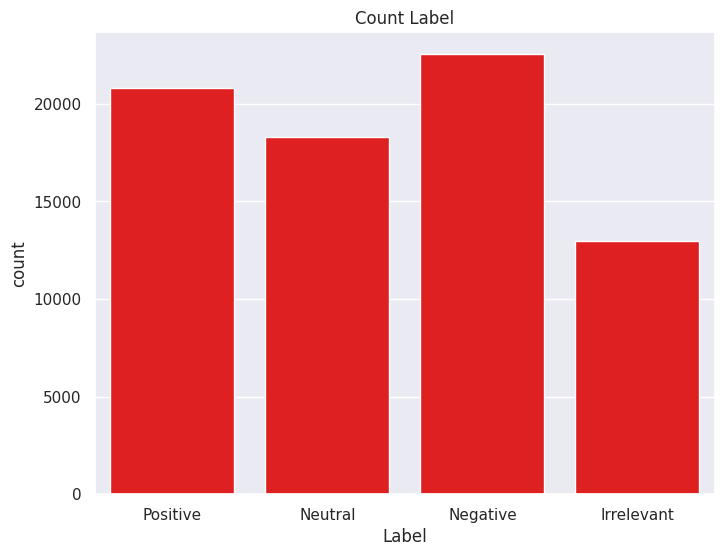

In [11]:
#count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels', color='red')
plt.title('Count Label')
plt.xlabel('Label')
plt.show()

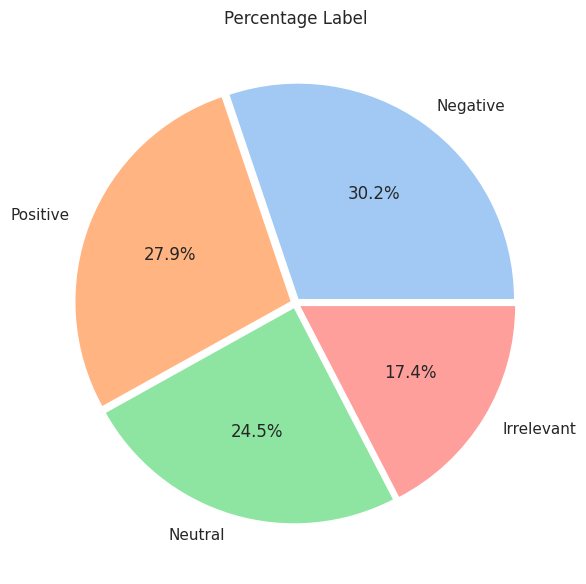

In [13]:
label_count = df['labels'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02] * len(label_count)

axes.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes.set_title('Percentage Label')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


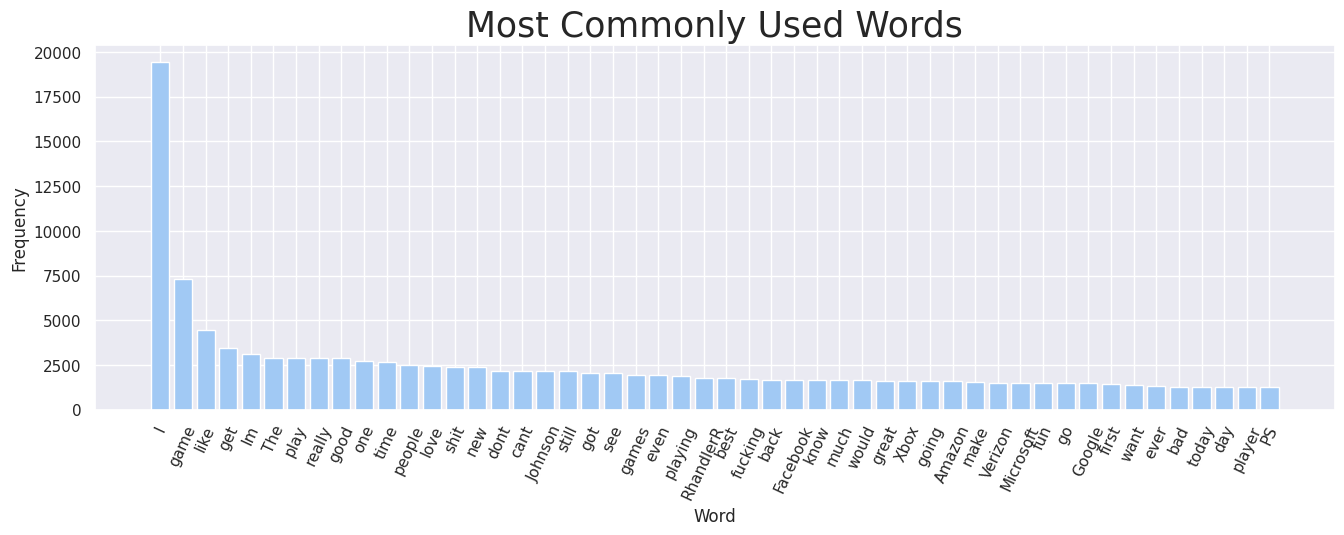

In [10]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter

# Download the 'stopwords' resource
nltk.download('stopwords')

def Most_Words_used(tweets, num_of_words):
    all_text = ''.join(df[tweets].values)

    all_text = re.sub('<.*?>', '', all_text)  # HTML tags
    all_text = re.sub(r'\d+', '', all_text)  # numbers
    all_text = re.sub(r'[^\w\s]', '', all_text)  # special characters
    all_text = re.sub(r'http\S+', '', all_text)  # URLs or web links
    all_text = re.sub(r'@\S+', '', all_text)  # mentions
    all_text = re.sub(r'#\S+', '', all_text)  # hashtags

    words = all_text.split()

    # remove puncs
    punc = list(punctuation)
    words = [word for word in words if word not in punc]

    # remove stopwords (now that 'stopwords' is downloaded)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    word_counts = Counter(words)
    top_words = word_counts.most_common(num_of_words)

    return top_words

top_words = Most_Words_used('tweets', 50)

xaxis = [word[0] for word in top_words]
yaxis = [word[1] for word in top_words]

plt.figure(figsize=(16, 5))
plt.bar(xaxis, yaxis)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words', fontsize=25)
plt.xticks(rotation=65)
plt.subplots_adjust(bottom=0.15)
plt.show()